<h1>Dog Breed Classification</h1><br>
<br>

<a id='Intro'></a>
## <h1>Introduction</h1>

There are many different versions of dog breeds that are out there in the world. I will use image classification algorithms to provide the most accurate predictions of using deep learning to have it correctly predict dog breeds based on the images that it detects and generates. 

<br>
The setup consists of a labels.csv file which consists of breed names and the image ids. There are two folders, test and train, that contain images of dogs. There will be training done on the images in the train folder. The Kaggle competition ended in February 2018, and if there is an opportunity in the future to submit my results, that will come up when it is most appropriate. In the meantime, for this project, I will not be submitting anything for the dog breed image classification project. 
<br>


<br>
The dataset comes from Kaggle, as the Dog Breed Identfication problem was a competition that was posted on their website. The citation can be found below.
<br>
Will Cukierski. Dog Breed Identification. https://kaggle.com/competitions/dog-breed-identification, 2017. Kaggle.
<br>


Notes:<br>
This was executed on an Anaconda environment using the following packages and respective versions.
<br>
<ul>
<li>Python v3.10.13</li>
<li>Tensorflow v2.12.0</li>
<li>Keras v2.12.0</li>
<li>Numpy v1.23.5</li>
<li>Pandas v2.2.3</li>
<li>Matplotlib-base v3.10.0</li>
</ul>

In [1]:
# Import basic libraries
import pandas as pd
import numpy as np
import os

# Import plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(94)

In [2]:
# Get the current working directory
os.getcwd()

'/Users/mjchin/Desktop/CUB_OMS_CS/Summer_2025/CSCA_5642_Intro_DL/FinalProject/dogbreedclassification'

In [3]:
# Go back one directory
os.chdir("..")

In [4]:
os.getcwd()

'/Users/mjchin/Desktop/CUB_OMS_CS/Summer_2025/CSCA_5642_Intro_DL/FinalProject'

<a id='EDA'></a>
## <h1>Exploratory Data Analysis</h1>

Take a look at some of the labels to get an understanding of the data that involves dog breeds. Open the CSV file and we will see the respective image IDs tied to a different dog breed.

In [5]:
# The path to the files should not be like this all the time; everything done offline
# Actual project is found on Kaggle, but elected to run on own environment which best fit needs
labels = pd.read_csv("dog-breed-identification/labels.csv")
labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


Now, get some information on the overall strucutre of the labels database. This includes the shape, column names, type info, and descriptive statistics, among others.

In [6]:
labels.shape

(10222, 2)

In [7]:
labels.columns

Index(['id', 'breed'], dtype='object')

In [8]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10222 entries, 0 to 10221
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10222 non-null  object
 1   breed   10222 non-null  object
dtypes: object(2)
memory usage: 159.8+ KB


In [9]:
labels.isnull()

,id,breed
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
10217,False,False
10218,False,False
10219,False,False
10220,False,False


In [10]:
labels.describe()

,id,breed
count,10222,10222
unique,10222,120
top,000bec180eb18c7604dcecc8fe0dba07,scottish_deerhound
freq,1,126


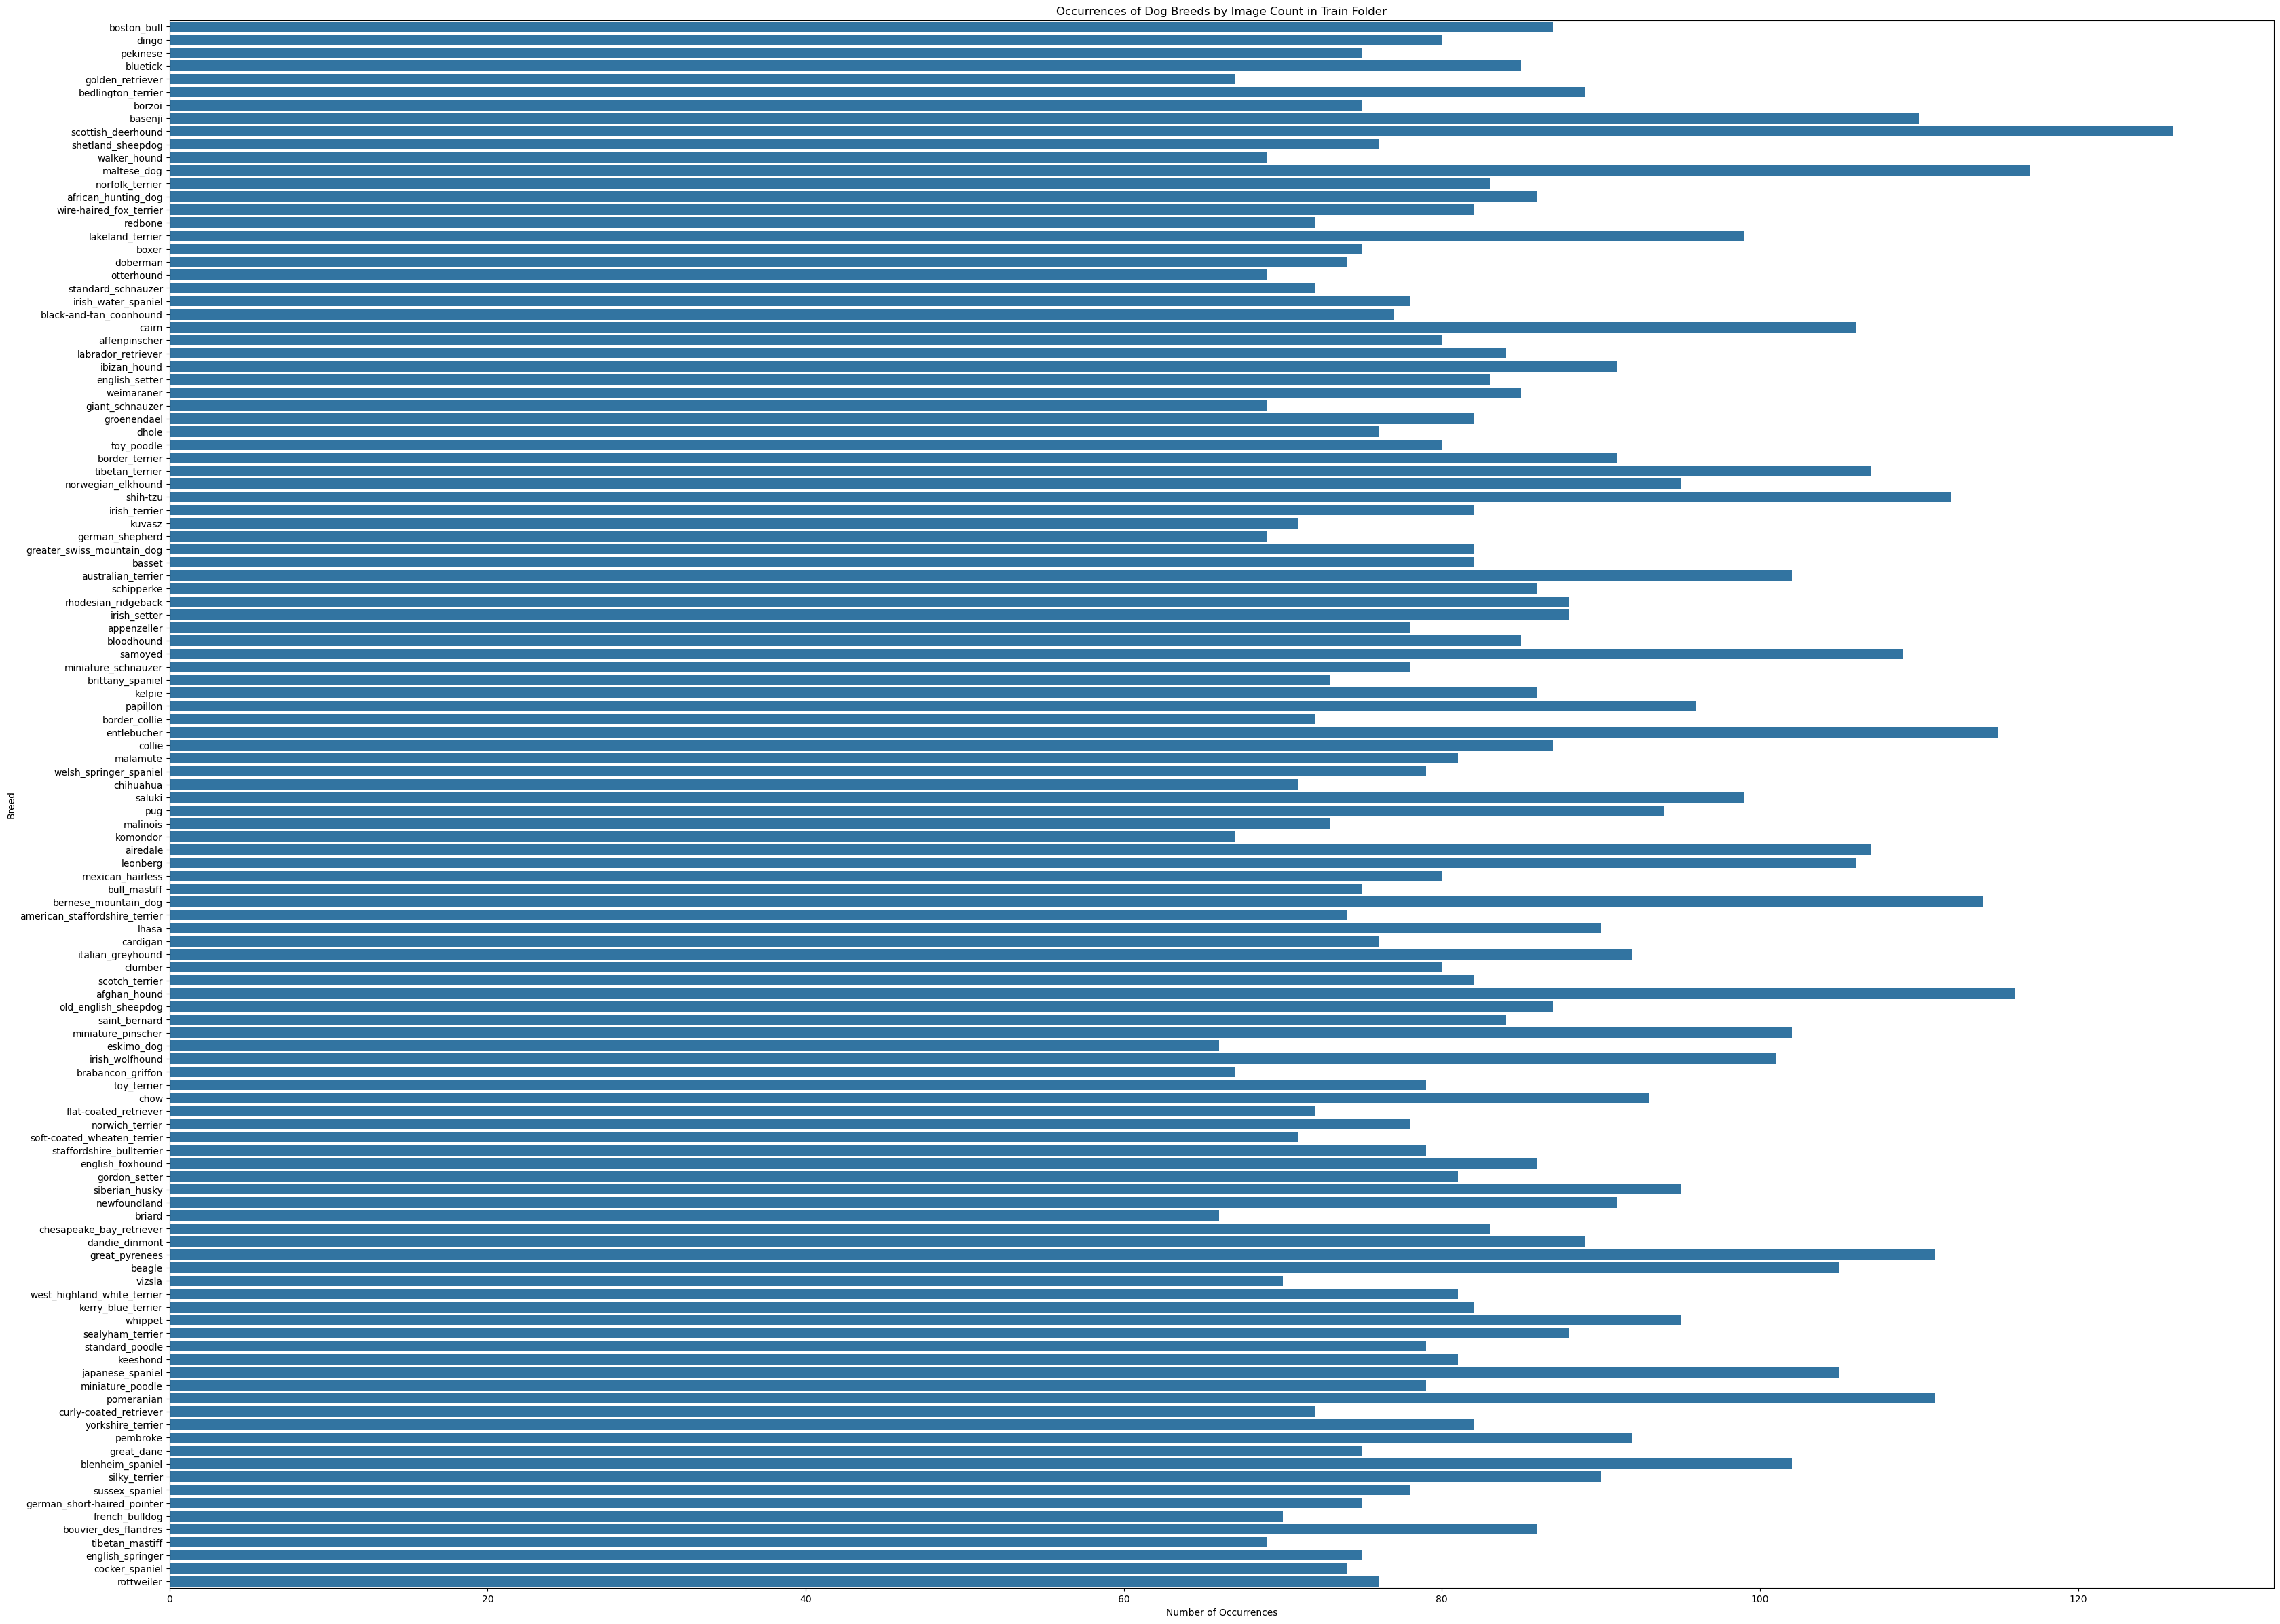

In [11]:
# Visualize dog breed counts
plt.figure(figsize=(40,30))
sns.countplot(y="breed",data=labels)
plt.xlabel("Number of Occurrences")
plt.ylabel("Breed")
plt.title("Occurrences of Dog Breeds by Image Count in Train Folder")
plt.show()

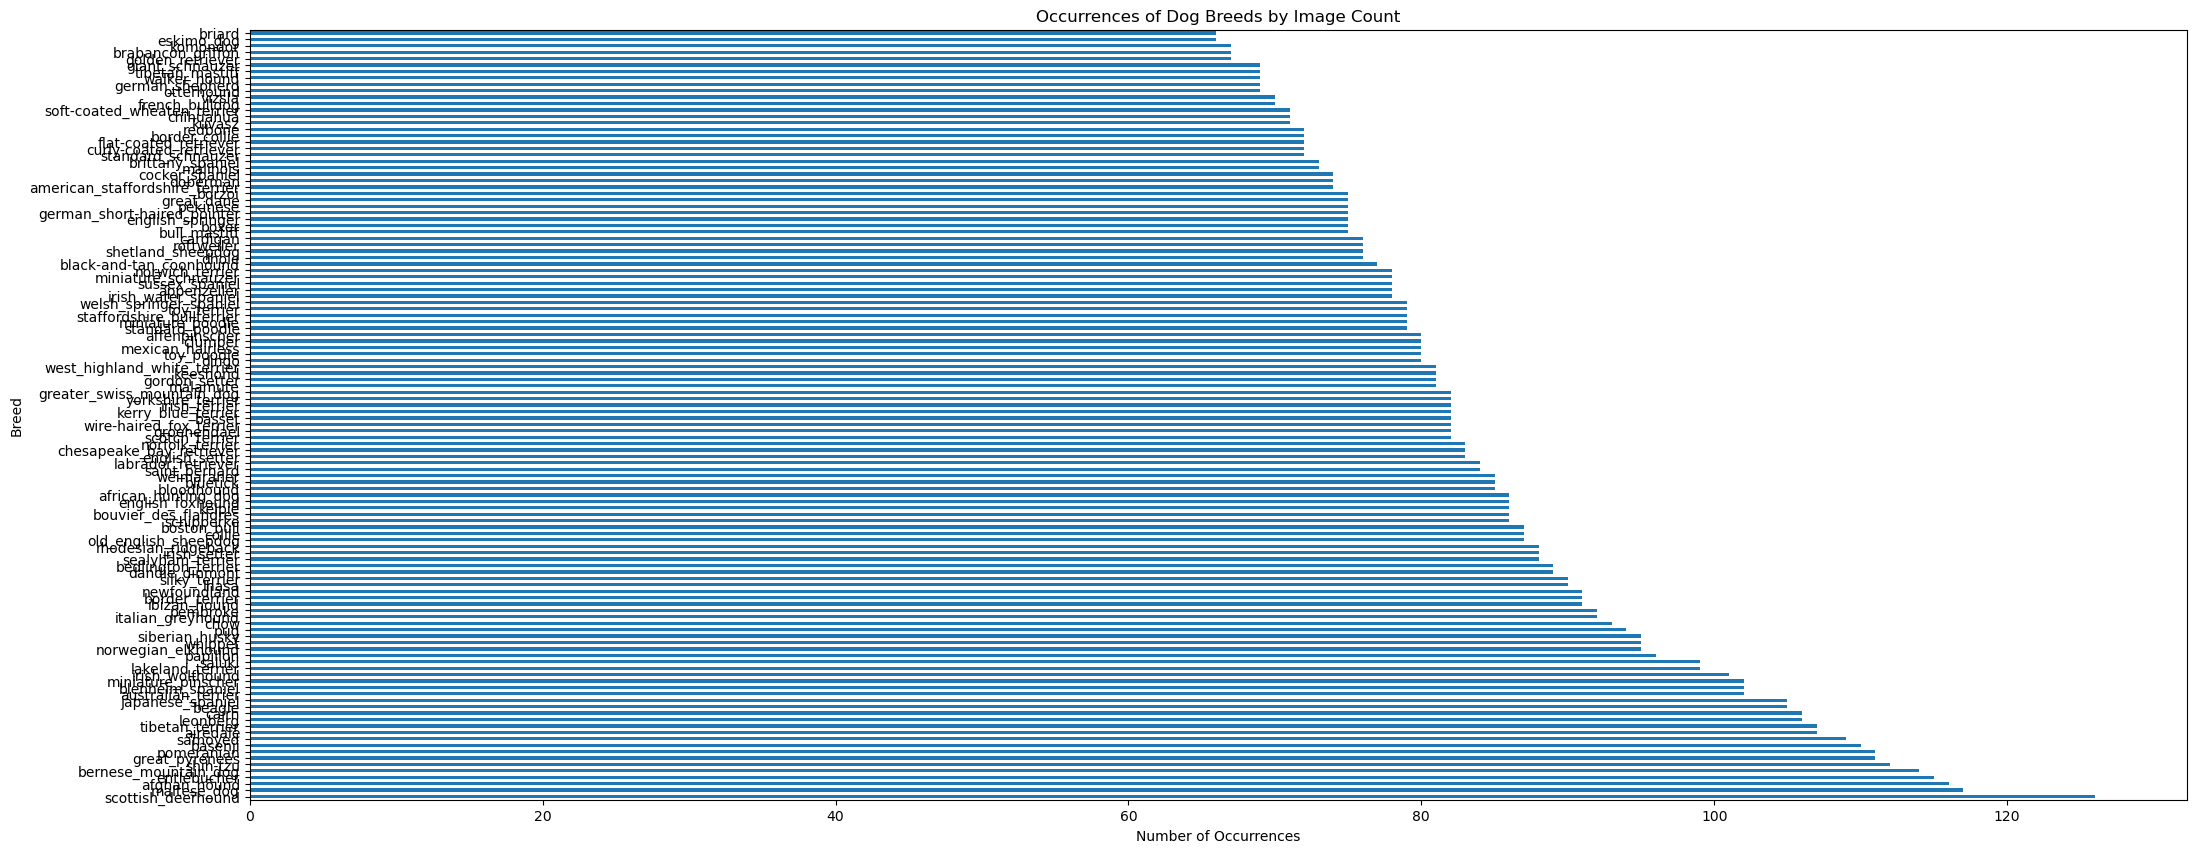

In [12]:
# Show all dog breed images occurrences in order, ascending from least to most
labels['breed'].value_counts().plot.barh(figsize=(25,10))
plt.xlabel("Number of Occurrences")
plt.ylabel("Breed")
plt.title("Occurrences of Dog Breeds by Image Count")
plt.show()

Get a few samples of images from train directory - note that the file types for the images ends in '.jpg'. 
First, use the Image package from the IPython library to get single images, then follow it up with multiple batches of images by dog breed.

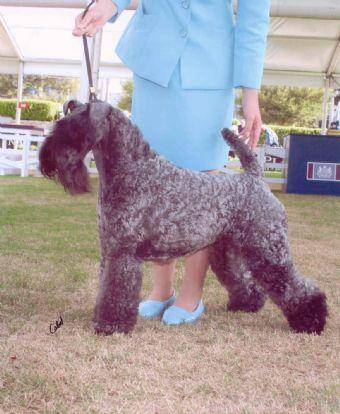

In [13]:
from IPython.display import Image
Image("dog-breed-identification/train/0a1f8334a9f583cac009dc033c681e47.jpg")

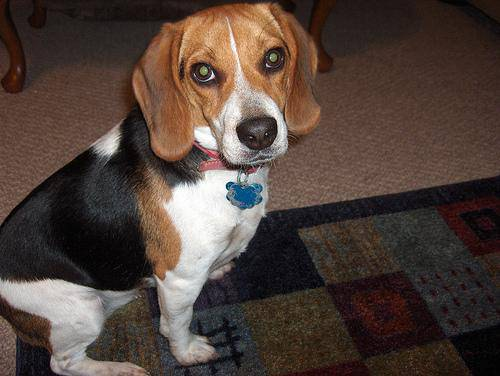

In [14]:
Image("dog-breed-identification/train/0b9d58d8d2626f80bbc5cc3ccf7e8bad.jpg")

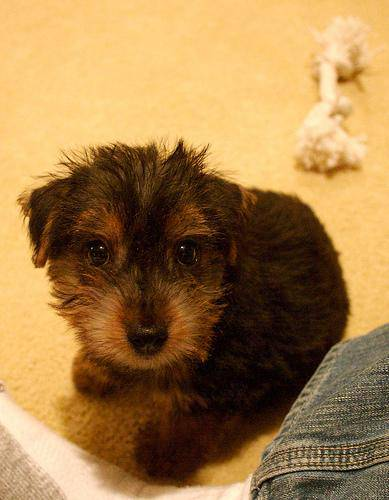

In [15]:
Image("dog-breed-identification/train/fc33f90570fc8502e6c3f83a6bf3b982.jpg")

Before doing batches of images by dog breed, take a look at what our goal is: to submit a file with appropriate labels to image IDs. 
<br>
Since this came from a Kaggle competition, take a look at the sample_submission.csv file that came with all the data that was downloaded locally. The purpose of this image classification is to predict the probability that a dog image consists of at least one of several different dog breeds. The higher the probability percentage, the more likely that that image is that dog breed.  
<br>
For the purpose of this project, we will not be submitting a CSV file, but will make one as if it is in the competition. I am using older versions of Python, TensorFlow, Keras, etc., due to past and present familiarity with these versions.

In [16]:
# Get first five rows of the sample submit file 
sample = pd.read_csv("dog-breed-identification/sample_submission.csv")
sample.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
1,00102ee9d8eb90812350685311fe5890,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
2,0012a730dfa437f5f3613fb75efcd4ce,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
3,001510bc8570bbeee98c8d80c8a95ec1,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
4,001a5f3114548acdefa3d4da05474c2e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333


(375, 500, 3)
(333, 500, 3)
(451, 500, 3)
(375, 500, 3)
(500, 429, 3)
(375, 500, 3)
(500, 333, 3)
(375, 500, 3)
(375, 500, 3)
(375, 500, 3)


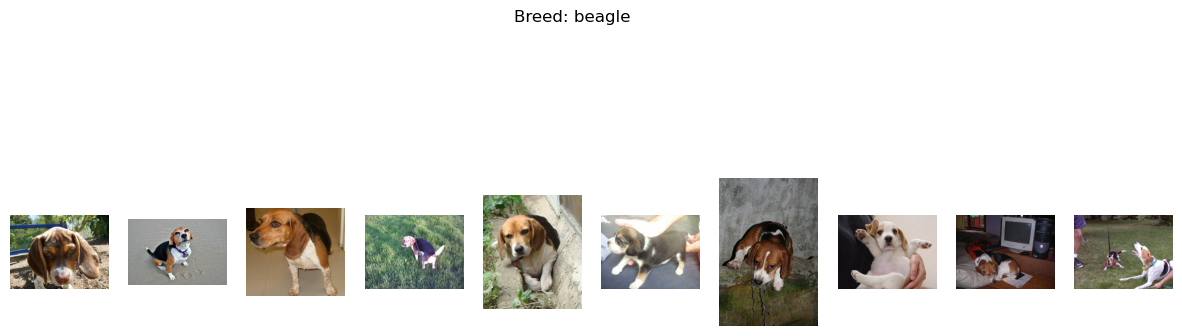

In [17]:
import cv2

# Also shows the image of any one shape - or the number of pixels on any one image
base_path='dog-breed-identification/train'
def show_samples(df, breed, n=10):
    samples = df[df['breed'] == breed].sample(n)
    fig, axes = plt.subplots(1, n, figsize=(15, 5))
    for img_id, ax in zip(samples['id'], axes):
        # img = get_image(img_id)
        path = os.path.join(base_path, f"{img_id}.jpg")
        img = cv2.imread(path)
        print(img.shape)

        ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        ax.axis('off')
    plt.suptitle(f"Breed: {breed}")
    plt.show()

# Show samples of beagles
show_samples(labels, breed='beagle')

In [18]:
# Get how many Beagle images there are in train dataset - should be 105
labels[labels['breed'] == 'beagle'].shape

(105, 2)

(1800, 1200, 3)
(360, 500, 3)
(500, 333, 3)
(375, 500, 3)
(332, 500, 3)
(375, 500, 3)
(333, 500, 3)
(333, 500, 3)
(200, 245, 3)
(333, 500, 3)


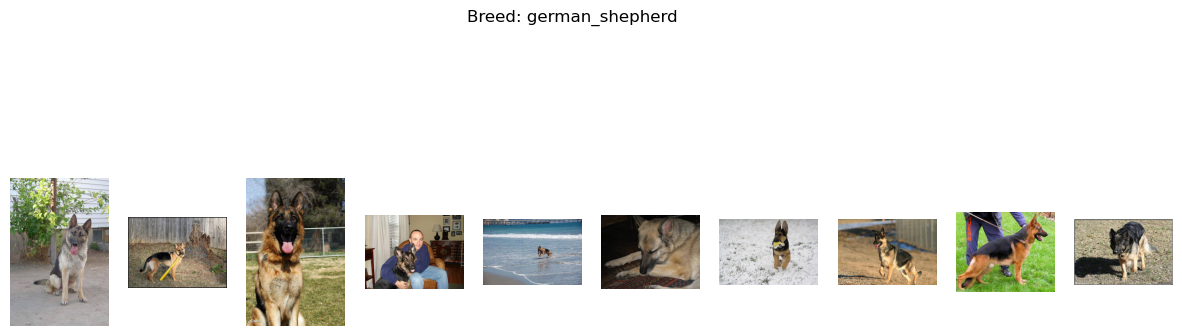

In [19]:
# Show samples of German Shepherds
show_samples(labels, breed='german_shepherd')

In [20]:
# Get how many German Shepherd images there are in train dataset - should be 69
labels[labels['breed'] == 'german_shepherd'].shape

(69, 2)

In [21]:
# Get value counts of all dog breeds occurrences from labels dataset
labels['breed'].value_counts()

breed
scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
eskimo_dog               66
briard                   66
Name: count, Length: 120, dtype: int64

It can be seen from the value counts that the breed with the most labels is the Scottish Deerhound, with 126.<br>
The dog breeds with the least number of labels from the labels CSV file are the Eskimo and Briard, with 66 occurrences each. 

In [22]:
len(labels['breed'])

10222

In [23]:
# Median number of value counts for a dog breed
labels['breed'].value_counts().median()

82.0

In [24]:
# Find how many unique breeds there are in the labels dataset
len(labels['breed'].unique())

120

In [25]:
# Get top 25 breeds with most occurring labels found
top25breeds= labels['breed'].value_counts().head(25)

# Type Series, convert to DataFrame
print(type(top25breeds))

top25breeds = top25breeds.reset_index()
print(type(top25breeds))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [26]:
# Get new top 25 breeds dataframe
print(top25breeds.shape)
print(top25breeds.columns)
print(top25breeds)

(25, 2)
Index(['breed', 'count'], dtype='object')
                   breed  count
0     scottish_deerhound    126
1            maltese_dog    117
2           afghan_hound    116
3            entlebucher    115
4   bernese_mountain_dog    114
5               shih-tzu    112
6         great_pyrenees    111
7             pomeranian    111
8                basenji    110
9                samoyed    109
10              airedale    107
11       tibetan_terrier    107
12              leonberg    106
13                 cairn    106
14                beagle    105
15      japanese_spaniel    105
16    australian_terrier    102
17      blenheim_spaniel    102
18    miniature_pinscher    102
19       irish_wolfhound    101
20      lakeland_terrier     99
21                saluki     99
22              papillon     96
23    norwegian_elkhound     95
24               whippet     95


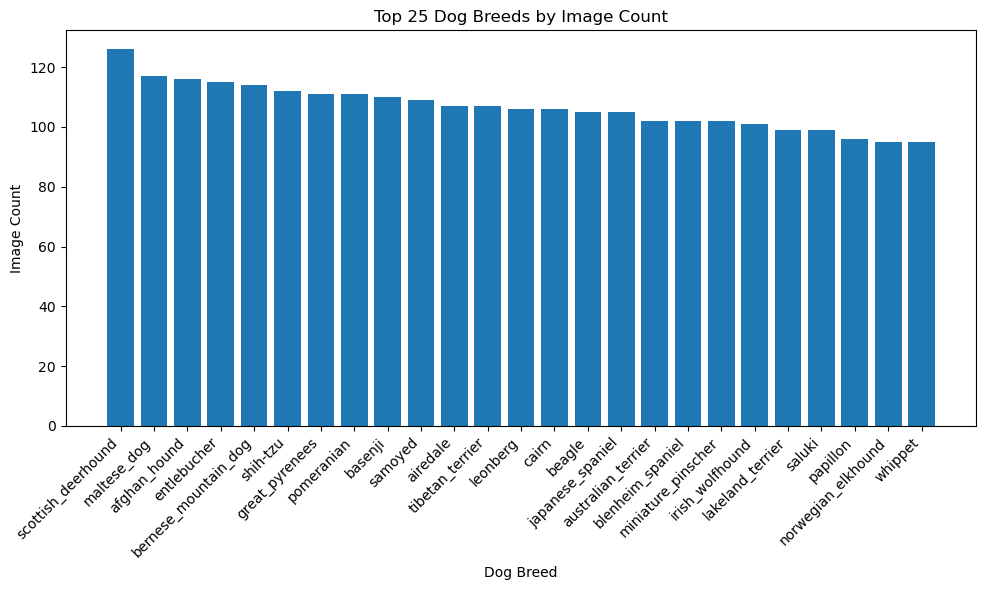

In [27]:
plt.figure(figsize=(10, 6)) # Adjust figure size as needed
plt.bar(top25breeds['breed'], top25breeds['count'])
plt.xlabel("Dog Breed")
plt.ylabel("Image Count")
plt.title("Top 25 Dog Breeds by Image Count")
plt.xticks(range(len(top25breeds)), rotation=45, ha='right')
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [28]:
# Get count of images in train directory 
len(os.listdir('dog-breed-identification/train'))

10222

In [29]:
# Get count of images in test directory
len(os.listdir('dog-breed-identification/test'))

10357

In [30]:
# Add folder path to image files
labels['path'] = labels['id'].apply(lambda x : x + '.jpg')

In [31]:
labels.head()

,id,breed,path
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull,000bec180eb18c7604dcecc8fe0dba07.jpg
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo,001513dfcb2ffafc82cccf4d8bbaba97.jpg
2,001cdf01b096e06d78e9e5112d419397,pekinese,001cdf01b096e06d78e9e5112d419397.jpg
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick,00214f311d5d2247d5dfe4fe24b2303d.jpg
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever,0021f9ceb3235effd7fcde7f7538ed62.jpg


<a id='Modeling Prep'></a>
## <h1>Model Preparation</h1>

After some visualizations, it is time to prepare our data. First, import the required libraries to prepare and split the data. Some preprocessing will need to be done because it can be seen that some of the images vary in size and therefore need to be standardized for the model to run properly to generate probabilities on which dog breed an image is. Set up some constants so that the deep learning pipeline workflow process remains constant for the modeling. 
<br> 

Additionally, set up any and all necessary directories to separate the images for the pre-training of image classification. There will be a base directory, followed by train and validation subdirectories. There also requires the need for base, train, and validation directories. 
<br>

Let's compare some of the Keras models and import many of the needed TensorFlow and Scikit-learn libraries that will be needed.
<br>


In [32]:
# Import TensorFlow, Keras, Scikit-learn libraries to be used

import tensorflow as tf # Use tf v2.12.0
from keras import layers, models, callbacks, optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

tf.random.set_seed(104)

In [33]:
# # Set up environment with train and valid directories

# base_dir = 'dogbreedclassification/base_dir'
# os.makedirs(base_dir, exist_ok=True)

# # Create a path to 'base' to make the two directories inside of base
# # Make the directory train_dir
# train_dir = os.path.join(base_dir, 'train_dir')
# os.makedirs(train_dir, exist_ok=True)

# # Make the directory val_dir
# val_dir = os.path.join(base_dir, 'val_dir')
# os.makedirs(val_dir, exist_ok=True)

# # Make the directory test_dir
# test_dir = os.path.join(base_dir, 'test_dir')
# os.makedirs(test_dir, exist_ok=True)


In [34]:
# Create the subdirectories inside the train directories that were just created
# matched = os.path.join(train_dir, 'matched')
# os.makedirs(matched, exist_ok=True)
# not_matched = os.path.join(train_dir, 'not_matched')
# os.makedirs(not_matched, exist_ok=True)


# # create new folders inside valid directories that were just created
# matched = os.path.join(val_dir, 'matched')
# os.makedirs(matched, exist_ok=True)
# not_matched = os.path.join(val_dir, 'not_matched')
# os.makedirs(not_matched, exist_ok=True)

In [35]:
from keras.applications import (MobileNetV2, 
                                            ResNet50, 
                                            ResNet101, 
                                            Xception, 
                                            InceptionResNetV2, 
                                            NASNetLarge, 
                                            NASNetMobile,
                                            EfficientNetB0, 
                                            VGG16, 
                                            VGG19)

# Dictionary to map model names to their corresponding classes
models_dict = {
    "mobilenetv2": MobileNetV2,
    "resnet50": ResNet50,
    "resnet101": ResNet101,
    "xception": Xception,
    "inceptionresnetv2": InceptionResNetV2,
    "nasnetlarge": NASNetLarge,
    "nasnetmobile": NASNetMobile,
    "efficientnetb0": EfficientNetB0,
    "vgg16": VGG16,
    "vgg19": VGG19
}

In [36]:
# Compare different Keras models
# Source: https://medium.com/@avinashkella/a-comprehensive-guide-to-comparing-pretrained-deep-learning-models-in-tensorflow-e22e8c1abcf4


def compare_models(model1_name, model2_name):
    model1 = models_dict[model1_name](weights='imagenet')
    model2 = models_dict[model2_name](weights='imagenet')
    
    # Compare model architectures
    print(f"Model architectures: {model1_name} vs {model2_name}")
    print(model1.summary())
    print(model2.summary())
    print("--------------------------------------------")
    
    # Compare number of parameters
    params_model1 = model1.count_params()
    params_model2 = model2.count_params()
    print(f"Number of parameters in {model1_name}: {params_model1}")
    print(f"Number of parameters in {model2_name}: {params_model2}")
    print("--------------------------------------------")
    
    # Compare number of layers
    num_layers_model1 = len(model1.layers)
    num_layers_model2 = len(model2.layers)
    print(f"Number of layers in {model1_name}: {num_layers_model1}")
    print(f"Number of layers in {model2_name}: {num_layers_model2}")
    print("--------------------------------------------")
    
    # Compare input shapes
    input_shape_model1 = model1.input_shape
    input_shape_model2 = model2.input_shape
    print(f"Input shape of {model1_name}: {input_shape_model1}")
    print(f"Input shape of {model2_name}: {input_shape_model2}")
    print("--------------------------------------------")
    
    # Compare output shapes
    output_shape_model1 = model1.output_shape
    output_shape_model2 = model2.output_shape
    print(f"Output shape of {model1_name}: {output_shape_model1}")
    print(f"Output shape of {model2_name}: {output_shape_model2}")
    print("--------------------------------------------")
    
    # Compare layer types
    layers_model1 = [layer.__class__.__name__ for layer in model1.layers]
    layers_model2 = [layer.__class__.__name__ for layer in model2.layers]
    print(f"Layer types in {model1_name}: {layers_model1}")
    print(f"Layer types in {model2_name}: {layers_model2}")
    print("--------------------------------------------")
    
    # Compare normalization layers
    normalization_layers_model1 = [layer.__class__.__name__ for layer in model1.layers if isinstance(layer, tf.keras.layers.BatchNormalization)]
    normalization_layers_model2 = [layer.__class__.__name__ for layer in model2.layers if isinstance(layer, tf.keras.layers.BatchNormalization)]
    print(f"Normalization layers in {model1_name}: {normalization_layers_model1}")
    print(f"Normalization layers in {model2_name}: {normalization_layers_model2}")
    print("--------------------------------------------")
    
    # Compare skip connections
    skip_connections_model1 = any(isinstance(layer, tf.keras.layers.Add) or isinstance(layer, tf.keras.layers.Concatenate) for layer in model1.layers)
    skip_connections_model2 = any(isinstance(layer, tf.keras.layers.Add) or isinstance(layer, tf.keras.layers.Concatenate) for layer in model2.layers)
    print(f"Skip connections in {model1_name}: {skip_connections_model1}")
    print(f"Skip connections in {model2_name}: {skip_connections_model2}")
    print("--------------------------------------------")
    
    # Compare model size
    model_size_model1 = model1_size = sum([tf.keras.backend.count_params(w) for w in model1.trainable_weights])
    model_size_model2 = model2_size = sum([tf.keras.backend.count_params(w) for w in model2.trainable_weights])
    print(f"Model size of {model1_name}: {model_size_model1}")
    print(f"Model size of {model2_name}: {model_size_model2}")
    print("--------------------------------------------")
    
    # Compare pooling layers
    pooling_layers_model1 = [layer.__class__.__name__ for layer in model1.layers if isinstance(layer, tf.keras.layers.MaxPooling2D) or isinstance(layer, tf.keras.layers.AveragePooling2D)]
    pooling_layers_model2 = [layer.__class__.__name__ for layer in model2.layers if isinstance(layer, tf.keras.layers.MaxPooling2D) or isinstance(layer, tf.keras.layers.AveragePooling2D)]
    print(f"Pooling layers in {model1_name}: {pooling_layers_model1}")
    print(f"Pooling layers in {model2_name}: {pooling_layers_model2}")
    print("--------------------------------------------")

# Example usage
compare_models("efficientnetb0", "nasnetlarge")

Model architectures: efficientnetb0 vs nasnetlarge
Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 rescaling_1 (Rescaling)        (N

In [37]:
compare_models("vgg16", "vgg19")

Model architectures: vgg16 vs vgg19
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2

In [38]:
# Get the TensorFlow Version - we are using v2.12.0
print(tf.__version__)

2.12.0


In [39]:
# Set up the train-test split to be 80%-20%
RANDOM = 24
train_set, test_set = train_test_split(labels, test_size=0.2, random_state=RANDOM)

# Initialize a validation set, make test size 10%
train_set, valid_set = train_test_split(train_set, test_size=0.1, random_state=RANDOM)

In [51]:
# Reset the indices on all datasets
train_set = train_set.reset_index()
train_set

,level_0,index,id,breed,path
0,0,3672,5b9656ed9f494add26b3ffd175cd7bae,german_short-haired_pointer,5b9656ed9f494add26b3ffd175cd7bae.jpg
1,1,237,058d4bfce39c9f1157ca4c1b019bbf1a,scottish_deerhound,058d4bfce39c9f1157ca4c1b019bbf1a.jpg
2,2,1941,2fd760238f5a77668218f0c90ef4793d,chihuahua,2fd760238f5a77668218f0c90ef4793d.jpg
3,3,6590,a5b5b960900c7e0d7c96d2a88f44e84a,saluki,a5b5b960900c7e0d7c96d2a88f44e84a.jpg
4,4,9127,e5679014512835a825578b7b15676df2,japanese_spaniel,e5679014512835a825578b7b15676df2.jpg
...,...,...,...,...,...
7354,7354,94,024ecfa590271db8616bfaa59159d7b2,malinois,024ecfa590271db8616bfaa59159d7b2.jpg
7355,7355,5037,7f62b9937dbacb5827ba961e6dd65854,dandie_dinmont,7f62b9937dbacb5827ba961e6dd65854.jpg
7356,7356,6613,a6418161b67df372016f510bfd71ddb6,cairn,a6418161b67df372016f510bfd71ddb6.jpg
7357,7357,7481,bbd33c81755e1243855a1e11f44f4db6,bernese_mountain_dog,bbd33c81755e1243855a1e11f44f4db6.jpg


In [53]:
valid_set = valid_set.reset_index()
test_set = test_set.reset_index()
valid_set

,index,id,breed,path
0,9041,e342333b4dd5d53c4720bb69b72cfe4e,silky_terrier,e342333b4dd5d53c4720bb69b72cfe4e.jpg
1,4138,67013986c89b3e6ba3d9574eb9b0d202,weimaraner,67013986c89b3e6ba3d9574eb9b0d202.jpg
2,2921,483a6d59747312ff93e58774e251eeb2,american_staffordshire_terrier,483a6d59747312ff93e58774e251eeb2.jpg
3,26,00a862390341c5be090dd72bd2bc19ef,standard_schnauzer,00a862390341c5be090dd72bd2bc19ef.jpg
4,4233,6960dd002d6479615fbfa5c70d3bbe30,pembroke,6960dd002d6479615fbfa5c70d3bbe30.jpg
...,...,...,...,...
813,9310,e9ac785eb7c5e7c31dd54be18e40bff2,brittany_spaniel,e9ac785eb7c5e7c31dd54be18e40bff2.jpg
814,865,15190d69d724d7e94ef64a347b959ccb,african_hunting_dog,15190d69d724d7e94ef64a347b959ccb.jpg
815,9698,f3f01549c30b4d1ae3e6701b729ab080,entlebucher,f3f01549c30b4d1ae3e6701b729ab080.jpg
816,5909,9529b8093aeca32d8828004347667c44,komondor,9529b8093aeca32d8828004347667c44.jpg


In [54]:
train_ids = list(train_set['id'])
valid_ids = list(valid_set['id'])

In [55]:
# Set up constants for model
RANDOM_STATE = 50
IMG_SIZE = 300
DOG_BREEDS = len(labels['breed'].unique())
LEARNING_RATE = 0.005
BATCH_SIZE = 32

# Epochs value may vary based on number of tests
EPOCHS = 5

In [56]:
# Create ImageDataGenerator objects for image processing
# Rescale images for coefficients in RGB are divided by 255 so that values are between 0 and 1
train_gen = ImageDataGenerator(rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_gen = ImageDataGenerator(rescale=1./255)
valid_gen = ImageDataGenerator(rescale=1./255)

In [57]:
# Get train images and transfer into folders
import shutil
pull_path = 'dog-breed-identification'

for image in train_ids:
    
    # the id in the csv file does not have the .tif extension therefore we add it here
    fname = image + '.jpg'
    print(fname)
    # get the label for a certain image
    target = labels.loc[fname, 'path']
    
    # these must match the folder names
    if target == fname:
        label = 'matched'
    else:
        label = 'not_matched'
    
    # source path to image data path
    src = os.path.join(pull_path, 'train', fname)
    # destination path to image
    dst = os.path.join(train_dir, label, fname)
    # copy the image from the source to the destination
    shutil.copyfile(src, dst)



5b9656ed9f494add26b3ffd175cd7bae.jpg


KeyError: '5b9656ed9f494add26b3ffd175cd7bae.jpg'

In [46]:
# for image in valid_ids:
    
#     # the id in the csv file does not have the .tif extension therefore we add it here
#     fname = image + '.jpg'
#     # get the label for a certain image
#     target = labels.loc[image,'path']
    
#     # these must match the folder names
#     if target == fname:
#         label = 'matched'
#     else:
#         label = 'not_matched'
    
#     # source path to image data path
#     src = os.path.join(pull_path, 'train', fname)
#     # destination path to image
#     dst = os.path.join(train_dir, label, fname)
#     # copy the image from the source to the destination
#     shutil.copyfile(src, dst)

<a id='Modeling'></a>
## <h1>Modeling</h1>

Create the ImageDataGenerators and align them properly to the datasets and values they are to be associated to prior to modeling. Layers are to be created before compilation and data fitting. 

In [47]:
# Create data generators for ImageDataGenerators
train_gen = train_gen.flow_from_dataframe(train_set, train_dir, 'id', 'breed', target_size=(IMG_SIZE, IMG_SIZE),
                                          batch_size=BATCH_SIZE, class_mode='categorical')
test_gen = test_gen.flow_from_dataframe(test_set, train_dir, 'id', 'breed', target_size=(IMG_SIZE, IMG_SIZE),
                                          batch_size=BATCH_SIZE, class_mode='categorical')
valid_gen = valid_gen.flow_from_dataframe(valid_set, val_dir, 'id', 'breed', target_size=(IMG_SIZE, IMG_SIZE),
                                          batch_size=BATCH_SIZE, class_mode='categorical')


NameError: name 'train_dir' is not defined

In [ ]:
# Create base model
# As stated previously, data format of images is in RGB channel
# Use VGG16 deep CNN for image classification, where there are 16 layers of artificial neurons

from keras.applications.vgg16 import VGG16
from keras import layers
from keras import models

img_shape = (IMG_SIZE, IMG_SIZE, 3)
base_model = VGG16(input_shape=img_shape, include_top=False, weights='imagenet')

for layer in base_model.layers: # Not needed to train all 16 layers
    layer.trainable = False

In [ ]:
from keras import optimizers
# Set up layers for the model, then initialize using base to compile the model

# Get layers to be one single dimension
flat = layers.Flatten()(base_model.output)

# Add a layer with 256 units and ReLU, which would make this layer fully connected
flat = layers.Dense(256, activation='relu')(flat)

# Set dropout rate to 0.6
flat = layers.Dropout(0.6)(flat)

# Make a sigmoid layer with 
flat = layers.Dense(1, activation='sigmoid')(flat)

model = models.Model(base_model.input, flat)
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.0005), 
              loss='binary_crossentropy', metrics=['acc'])


In [ ]:
# Fit generators into the model
history = model.fit(train_gen, validation_data=valid_gen, steps_per_epoch=100, epochs=EPOCHS)

ValueError: Asked to retrieve element 0, but the Sequence has length 0

In [ ]:
# # Set up the layers for model
# model = Sequential()
# model.add(Conv2D(32, (2, 2), input_shape=img_shape))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(32, (2, 2)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(64, (2, 2)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Flatten())
# model.add(Dense(64))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# model.add(Dense(1))
# model.add(Activation('sigmoid'))

In [ ]:
# # Get model compiled
# model.compile(loss='binary_crossentropy',
#               optimizer='Adam',
#               metrics=['accuracy'])

In [ ]:
# model.fit(train_gen, validation_data=valid_gen,
#           steps_per_epoch=train_gen.samples // BATCH_SIZE,
#           validation_steps=valid_gen.samples // BATCH_SIZE,
#           epochs=EPOCHS)